<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#S&amp;P-500-and-volatility" data-toc-modified-id="S&amp;P-500-and-volatility-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>S&amp;P 500 and volatility</a></span></li><li><span><a href="#Read-in-data" data-toc-modified-id="Read-in-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Read-in data</a></span></li><li><span><a href="#Correlation-via-visual-comparison" data-toc-modified-id="Correlation-via-visual-comparison-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Correlation via visual comparison</a></span></li><li><span><a href="#Correlation-via-log-returns" data-toc-modified-id="Correlation-via-log-returns-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Correlation via log returns</a></span></li><li><span><a href="#Correlation-via-OLS-Regression" data-toc-modified-id="Correlation-via-OLS-Regression-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Correlation via OLS Regression</a></span></li><li><span><a href="#Correlation-via-Person-coefficient" data-toc-modified-id="Correlation-via-Person-coefficient-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Correlation via Person coefficient</a></span></li><li><span><a href="#References" data-toc-modified-id="References-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>References</a></span></li><li><span><a href="#Requirements" data-toc-modified-id="Requirements-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Requirements</a></span></li></ul></div>

# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

**What?** Correlation analysis

</font>
</div>

# Imports
<hr style = "border:2px solid black" ></hr>

In [1]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%config InlineBackend.figure_format = 'svg'

# S&P 500 and volatility
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>
    
- Let's consider the case of the S&P 500 stock index and the VIX volatility index. When the S&P 500 rises, the VIX falls in general, and vice versa. This is about correlation and not causation. 
- **One reason behind this** is that when the stock index comes down—during a crisis, for instance—trading vol‐ ume goes up, and therewith also the volatility. When the stock index is on the rise, investors generally are calm and do not see much incentive to engage in heavy trading. In particular, long-only investors then try to ride the trend even further.

- We are going to use three methods to find some supporting statistical evidence for the fact that the S&P 500 and the VIX are (highly) negatively correlated:
    - [x] Via visual inspection
    - [x] Via visual inspection of the log returns
    - [x] Via OLS
    - [x] Via Person coefficient

</font>
</div>

# Read-in data
<hr style = "border:2px solid black" ></hr>

In [2]:
# EOD data from Thomson Reuters Eikon Data API
raw = pd.read_csv('../data/tr_eikon_eod_data.csv',
                 index_col=0, parse_dates=True)

In [3]:
data = raw[['.SPX', '.VIX']].dropna()

In [4]:
data.tail()

,.SPX,.VIX
Date,,
2018-06-25,2717.07,17.33
2018-06-26,2723.06,15.92
2018-06-27,2699.63,17.91
2018-06-28,2716.31,16.85
2018-06-29,2718.37,16.09


# Correlation via visual comparison
<hr style = "border:2px solid black" ></hr>

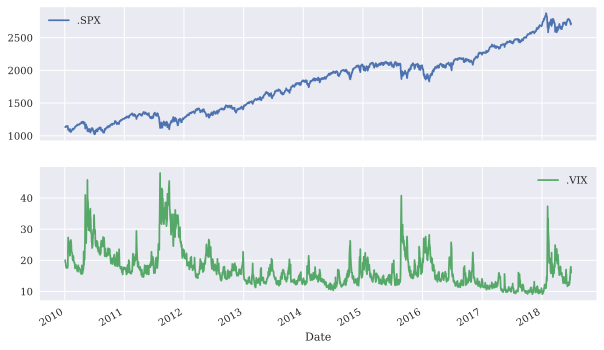

In [5]:
data.plot(subplots=True, figsize=(10, 6));

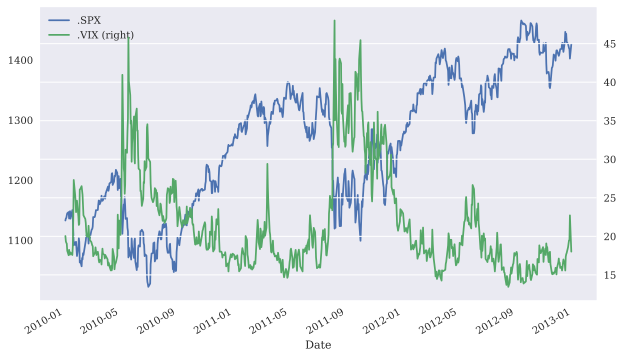

In [6]:
data.loc[:'2012-12-31'].plot(secondary_y='.VIX', figsize=(10, 6));  

# Correlation via log returns
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- As pointed out earlier, statistical analysis in general relies on returns instead of absolute changes or even absolute values. Therefore, we’ll calculate log returns first before any further analysis takes place. 
- Figure below shows the high variability of the log returns over time. For both indices so-called “volatility clusters” can be spotted. 
- In general, periods of high volatility in the stock index are accompanied by the same phenomena in the volatility index.
    
</font>
</div>

In [7]:
rets = np.log(data / data.shift(1)) 

In [8]:
rets.head()

,.SPX,.VIX
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024


In [9]:
rets.dropna(inplace=True)

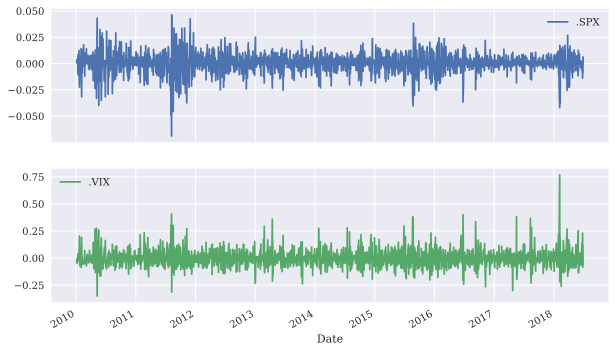

In [10]:
rets.plot(subplots=True, figsize=(10, 6));

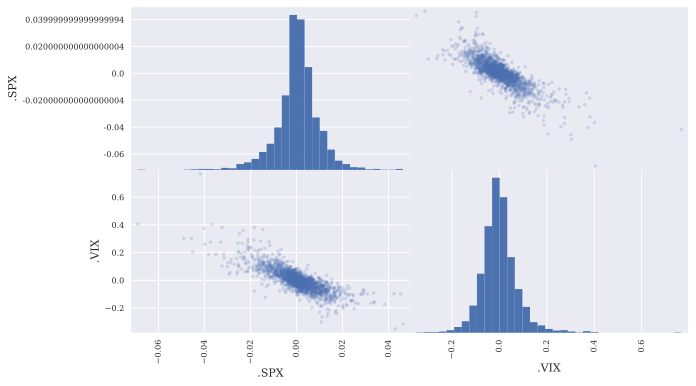

In [11]:
pd.plotting.scatter_matrix(rets,  
                           alpha=0.2,  
                           diagonal='hist',  
                           hist_kwds={'bins': 35},  
                           figsize=(10, 6));

# Correlation via OLS Regression
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>


- The slope is **negative**.
- This provides support for the fact about the negative correlation between the two indices.

</font>
</div>


In [12]:
reg = np.polyfit(rets['.SPX'], rets['.VIX'], deg=1)  

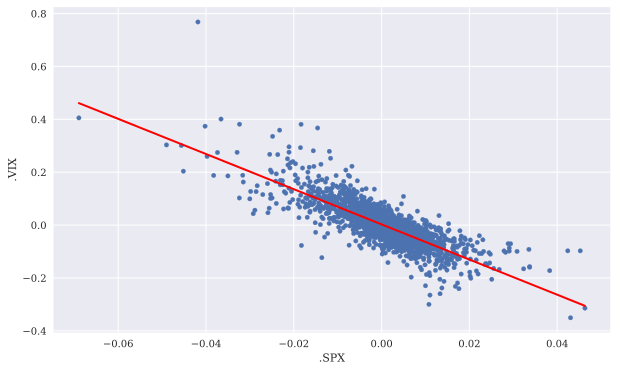

In [13]:
ax = rets.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(10, 6))  
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw=2);  

# Correlation via Person coefficient
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- Finally, we consider correlation measures directly. The default method is Pearson coefficient in pandas.
- Two such measures are considered: 
    - A static one taking into account the complete data set
    - A rolling one showing the correlation for a fixed window over time. 
- The static correlation conferms that correlation in negative and the same goes for rolling one; this last one varies over time but that it is always, given the parameterization, negative. 

</font>
</div>

In [14]:
rets.corr()  

,.SPX,.VIX
.SPX,1.000000,-0.804382
.VIX,-0.804382,1.000000


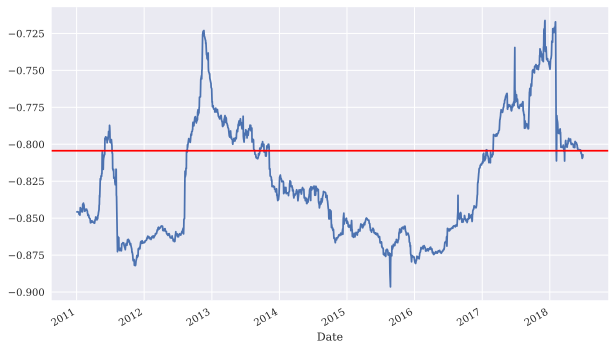

In [15]:
ax = rets['.SPX'].rolling(window=252).corr(
                  rets['.VIX']).plot(figsize=(10, 6))  
ax.axhline(rets.corr().iloc[0, 1], c='r');  

# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- https://github.com/yhilpisch/py4fi2nd/blob/master/code/ch08/08_financial_time_series.ipynb
- Hilpisch, Yves. Python for finance: mastering data-driven finance. O'Reilly Media, 2018.
- [Data](https://github.com/yhilpisch/py4fi2nd/tree/master/source)

</font>
</div>

# Requirements
<hr style = "border:2px solid black" ></hr>

In [16]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.10.4
IPython version      : 8.3.0

json      : 2.0.9
numpy     : 1.21.6
matplotlib: 3.5.3
autopep8  : 1.7.0
pandas    : 1.4.4

